In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

In [52]:
test1_df = pd.read_csv('SE_rents2018_test1.csv', index_col=0)
test2_df = pd.read_csv('SE_rents2018_test2.csv', index_col=0)
test3_df = pd.read_csv('SE_rents2018_test3.csv', index_col=0)

train_df = pd.read_csv('SE_rents2018_train.csv', index_col=0)
# bedrooms, bathrooms, size_sqft, and year_built use for linear model.
# borough, neighborhood, has_doorman, and size_sqft for non-linear model. 

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,...,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line
rental_id,,,,,,,,,,,,,,,,,,,,,
7428577,#4F,159457,0,1.0,450.0,2018-08-01 08:10:01,162 SMITH STREET,Brooklyn,11201,40.686319,...,0,0,NaN,0,"Large studio with high ceilings, plenty of nat...",Cobble Hill,Brooklyn,4F,4.0,F
7454944,NaN,1579540,2,1.0,950.0,2018-08-08 08:01:59,21-22 CLINTONVILLE STREET,Whitestone,11357,40.778608,...,0,0,NaN,0,Beautifully Renovated Second Floor Unit. Kitch...,Whitestone,Queens,NaN,NaN,NaN
7473595,#1D,64873,1,1.0,0.0,2018-08-14 08:04:27,676 AMSTERDAM AVENUE,New York,10025,40.792107,...,0,0,NaN,1,MID SEPT MOVE-IN NO fee! $2895\r\nIf you are l...,Upper West Side,Manhattan,1D,1.0,D
7490488,#5C,546541,2,1.0,500.0,2018-08-19 01:19:00,56 EAST 21 STREET,Brooklyn,11226,40.653046,...,0,0,NaN,1,"Here at Kenmore Place, beautifully curated apa...",Flatbush,Brooklyn,5C,5.0,C
7460896,#11G,10678,1,1.0,610.0,2018-08-09 14:05:52,101 AVENUE D,New York,10009,40.723506,...,1,0,NaN,1,STUNNING ONE BEDROOM WITH PRIVATE BALCONY. Fea...,East Village,Manhattan,11G,11.0,G
7479988,#19K,1468822,1,1.0,900.0,2018-08-15 17:08:18,104-20 QUEENS BOULEVARD,Forest Hills,11375,40.723202,...,0,0,NaN,1,Priced to rent fast! 19th floor one bed with k...,Forest Hills,Queens,19K,19.0,K
7496308,#1H,18742198,4,1.0,0.0,2018-08-21 12:05:19,7 LEXINGTON AVENUE,Brooklyn,11238,40.686587,...,0,0,NaN,1,Gorgeous Large Real 4BD 1.5 bathroom DUPLEX ap...,Clinton Hill,Brooklyn,1H,1.0,H
7468621,#314,55321,0,1.0,534.0,2018-08-12 11:01:07,505 WEST 54 STREET,New York,10019,40.767502,...,1,0,NaN,1,NO BROKER FEES. West 54th Apartments in New Yo...,Midtown West,Manhattan,314,3.0,14
7430797,#2D,57292,1,1.0,609.0,2018-08-01 15:18:33,50 WEST 77 STREET,New York,10024,40.780201,...,0,0,NaN,1,NO BROKER FEES. Parc 77 Apartments are located...,Upper West Side,Manhattan,2D,2.0,D


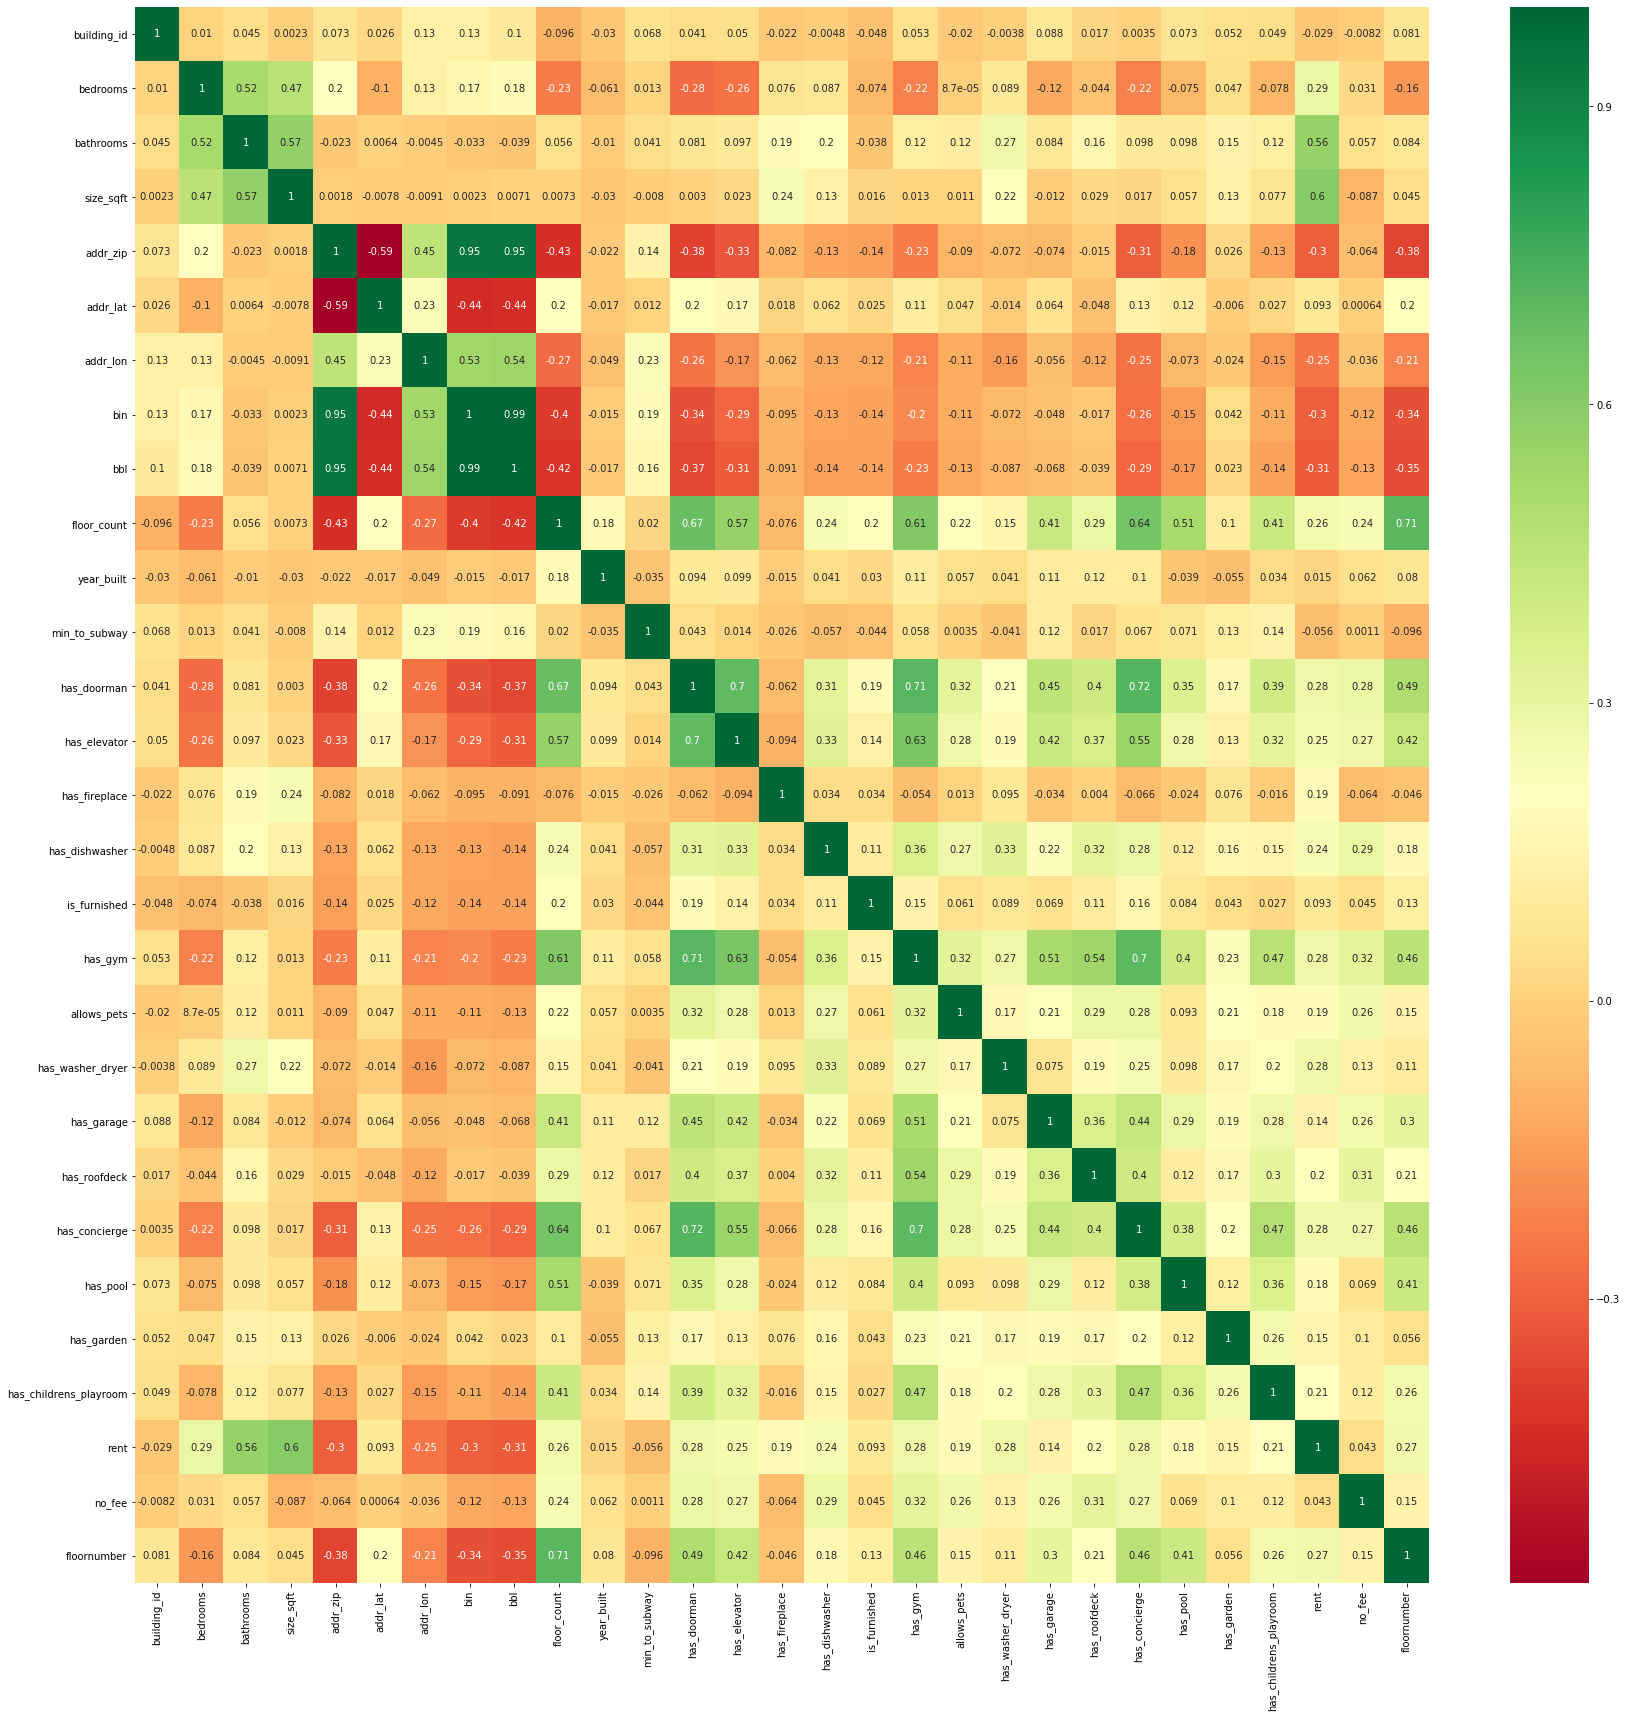

In [35]:
#using a heatmap to select meaningful features
#columns = test1_df[:,0:29]
#target = test1_df.rent
corrmat = test1_df.corr()
test1_top_corr = corrmat.index
plt.figure(figsize=(29,29))
test1_g = sns.heatmap(test1_df[test1_top_corr].corr(), annot=True, cmap="RdYlGn")

In [36]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None,
    resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')
        
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')



from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def train_linear_reg_model(X_train, y_train, X_test, y_test):
    """Trains and test linear regression model and returns mean_squared_error of
    y_test and y_predicted. 
    ----------
    X_train : array-like, shape = [n_samples, n_features]
        n_samples the number of samples
        n_features the number of features for each sample.
        
    y_train : array-like, shape = [n_samples]
        n_sample target values.
        
    X_test : array-like, shape = [n_samples, n_features]
        n_samples the number of samples
        n_features the number of features for each sample.
        
    y_test : array-like, shape = [n_samples]
        n_sample target values.
        
    Return 
        (float) mean_squared_error of (y_test and y_prediction)

    """

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    y_prediction = lr.predict(X_test)
    
    return mean_squared_error(y_test, y_prediction)

In [51]:
columns_needed = ['bathrooms', 'size_sqft', 'bin','bbl','has_doorman','floor_count','rent']
linear_reg_train_df = train_df[columns_needed]

# There are 11597 non-null entries in year_built out of 12000.
# I will drop these null entries. 
linear_reg_train_df = linear_reg_train_df.dropna(axis=0)

#linear_reg_train_df.info()


features = ['bathrooms', 'size_sqft','bin','bbl','has_doorman','floor_count']

train_dropped_na = linear_reg_train_df[features]
train_dropped_na_target = linear_reg_train_df[['rent']]

test2_lr_df = test2_df[features].dropna(axis=0)
test2_lr_target = test2_df[['rent']].fillna(0)

train_linear_reg_model(train_dropped_na, train_dropped_na_target, test2_lr_df, test2_lr_target)

17122637.130214192